In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
import datetime
from datetime import date, datetime
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm
from sklearn.metrics import classification_report

In [2]:
!pip install prince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.7/414.7 kB 17.0 MB/s eta 0:00:00


In [3]:
# Import prince library
import prince

# Create the contingency table as a DataFrame
data = pd.DataFrame({
    'Brown': [36, 66, 16, 4],
    'Blue': [9, 34, 7, 64],
    'Hazel': [5, 29, 7, 5],
    'Green': [2, 14, 7, 8]
}, index=['Black', 'Brown', 'Red', 'Blonde'])

# Perform correspondence analysis
ca = prince.CA(n_components=2)
ca.fit(data)

# Access the results
column_coords = ca.column_coordinates(data)
row_coords = ca.row_coordinates(data)
eigenvalues = ca.eigenvalues_
total_inertia = ca.total_inertia_

# Print the results
print("Column Coordinates:")
print(column_coords)
print("\nRow Coordinates:")
print(row_coords)
print("\nEigenvalues:")
print(eigenvalues)
print("\nTotal Inertia:")
print(total_inertia)

Column Coordinates:
              0         1
Brown -0.544730  0.131592
Blue   0.690730  0.069054
Hazel -0.295711 -0.277948
Green  0.042469 -0.359379

Row Coordinates:
               0         1
Black  -0.517074  0.346020
Brown  -0.260010 -0.079704
Red    -0.277820 -0.280148
Blonde  0.917884  0.046544

Eigenvalues:
[0.30245925 0.03263166]

Total Inertia:
0.3407787021422233


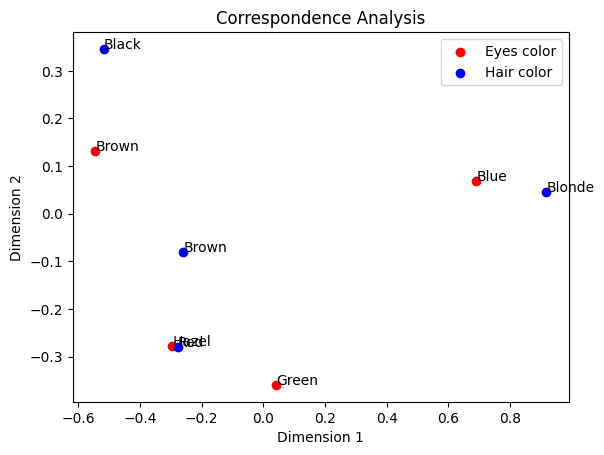

In [4]:
# Create scatter plot for column coordinates
plt.scatter(column_coords.iloc[:, 0], column_coords.iloc[:, 1], c='red', label='Eyes color')
for i, txt in enumerate(column_coords.index):
    plt.annotate(txt, (column_coords.iloc[i, 0], column_coords.iloc[i, 1]))

# Create scatter plot for row coordinates
plt.scatter(row_coords.iloc[:, 0], row_coords.iloc[:, 1], c='blue', label='Hair color')
for i, txt in enumerate(row_coords.index):
    plt.annotate(txt, (row_coords.iloc[i, 0], row_coords.iloc[i, 1]))

# Set plot title and labels
plt.title("Correspondence Analysis")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# Add legend
plt.legend()

# Show the plot
plt.show()

In [5]:
print(data)

        Brown  Blue  Hazel  Green
Black      36     9      5      2
Brown      66    34     29     14
Red        16     7      7      7
Blonde      4    64      5      8


In [6]:
data_excel = pd.read_excel('Eye and Hair Color.xlsx')
print(data_excel)

     Hair  Brown  Blue  Hazel  Green
0   Black     36     9      5      2
1   Brown     66    34     29     14
2     Red     16     7      7      7
3  Blonde      4    64      5      8


In [7]:
# Set 'Hair' column as the index
data_excel.set_index('Hair', inplace=True)
print(data_excel)

        Brown  Blue  Hazel  Green
Hair                             
Black      36     9      5      2
Brown      66    34     29     14
Red        16     7      7      7
Blonde      4    64      5      8


In [8]:
# Perform correspondence analysis
ca = prince.CA(n_components=2)
ca.fit(data_excel)

# Access the results
column_coords_excel = ca.column_coordinates(data_excel)
row_coords_excel = ca.row_coordinates(data_excel)
eigenvalues_excel = ca.eigenvalues_
total_inertia_excel = ca.total_inertia_

# Print the results
print("Column Coordinates:")
print(column_coords_excel)
print("\nRow Coordinates:")
print(row_coords_excel)
print("\nEigenvalues:")
print(eigenvalues_excel)
print("\nTotal Inertia:")
print(total_inertia_excel)

Column Coordinates:
              0         1
Brown -0.544730  0.131592
Blue   0.690730  0.069054
Hazel -0.295711 -0.277948
Green  0.042469 -0.359379

Row Coordinates:
               0         1
Hair                      
Black  -0.517074  0.346020
Brown  -0.260010 -0.079704
Red    -0.277820 -0.280148
Blonde  0.917884  0.046544

Eigenvalues:
[0.30245925 0.03263166]

Total Inertia:
0.3407787021422233


In [9]:
from matplotlib.patches import Circle

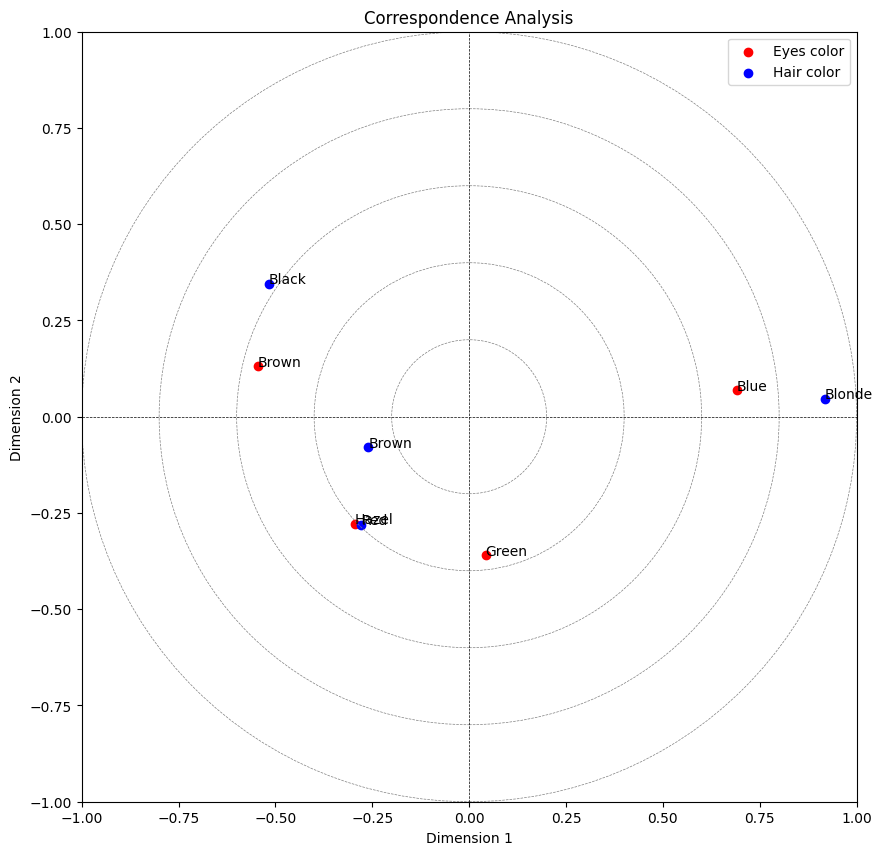

In [10]:
# Increase the size of the chart
plt.figure(figsize=(10, 10))

# Create scatter plot for column coordinates
plt.scatter(column_coords_excel.iloc[:, 0], column_coords_excel.iloc[:, 1], c='red', label='Eyes color')
for i, txt in enumerate(column_coords_excel.index):
    plt.annotate(txt, (column_coords_excel.iloc[i, 0], column_coords_excel.iloc[i, 1]))

# Create scatter plot for row coordinates
plt.scatter(row_coords_excel.iloc[:, 0], row_coords_excel.iloc[:, 1], c='blue', label='Hair color')
for i, txt in enumerate(row_coords_excel.index):
    plt.annotate(txt, (row_coords_excel.iloc[i, 0], row_coords_excel.iloc[i, 1]))


# Add lines on the zero axis
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)

radius = 0.2
for i in range(1, 6):
    circle = Circle((0, 0), radius * i, facecolor='none', edgecolor='gray', linestyle='--', linewidth=0.5)
    plt.gca().add_patch(circle)

# Set plot title and labels
plt.title("Correspondence Analysis")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# Add legend
plt.legend()

# Set the limits of the axis
plt.ylim(-1,1)
plt.xlim(-1,1)

# Show the plot
plt.show()

In [12]:
data_excel2 = pd.read_excel('Soft Drinks.xlsx')
print(data_excel2)

   Unnamed: 0  18 to 24  25 to 49  50 or more
0        Coke      0.65      0.42        0.40
1   Diet Coke      0.02      0.13        0.13
2   Coke Zero      0.09      0.21        0.20
3       Pepsi      0.07      0.12        0.05
4  Diet Pepsi      0.00      0.02        0.05
5   Pepsi Max      0.16      0.10        0.18


In [13]:
# Set 'Column 0' as the index
data_excel2.set_index('Unnamed: 0', inplace=True)
print(data_excel2)

            18 to 24  25 to 49  50 or more
Unnamed: 0                                
Coke            0.65      0.42        0.40
Diet Coke       0.02      0.13        0.13
Coke Zero       0.09      0.21        0.20
Pepsi           0.07      0.12        0.05
Diet Pepsi      0.00      0.02        0.05
Pepsi Max       0.16      0.10        0.18


In [14]:
# Perform correspondence analysis
ca = prince.CA(n_components=2)
ca.fit(data_excel2)

# Access the results
column_coords_excel2 = ca.column_coordinates(data_excel2)
row_coords_excel2 = ca.row_coordinates(data_excel2)
eigenvalues_excel2 = ca.eigenvalues_
total_inertia_excel2 = ca.total_inertia_

# Print the results
print("Column Coordinates:")
print(column_coords_excel2)
print("\nRow Coordinates:")
print(row_coords_excel2)
print("\nEigenvalues:")
print(eigenvalues_excel2)
print("\nTotal Inertia:")
print(total_inertia_excel2)

Column Coordinates:
                   0         1
18 to 24    0.417209 -0.015196
25 to 49   -0.180518  0.195983
50 or more -0.230217 -0.179147

Row Coordinates:
                   0         1
Unnamed: 0                    
Coke        0.239380  0.003432
Diet Coke  -0.548190  0.043739
Coke Zero  -0.316199  0.051455
Pepsi      -0.056335  0.365420
Diet Pepsi -0.735986 -0.467632
Pepsi Max   0.056237 -0.222694

Eigenvalues:
[0.08614653 0.02368421]

Total Inertia:
0.10983074331551892


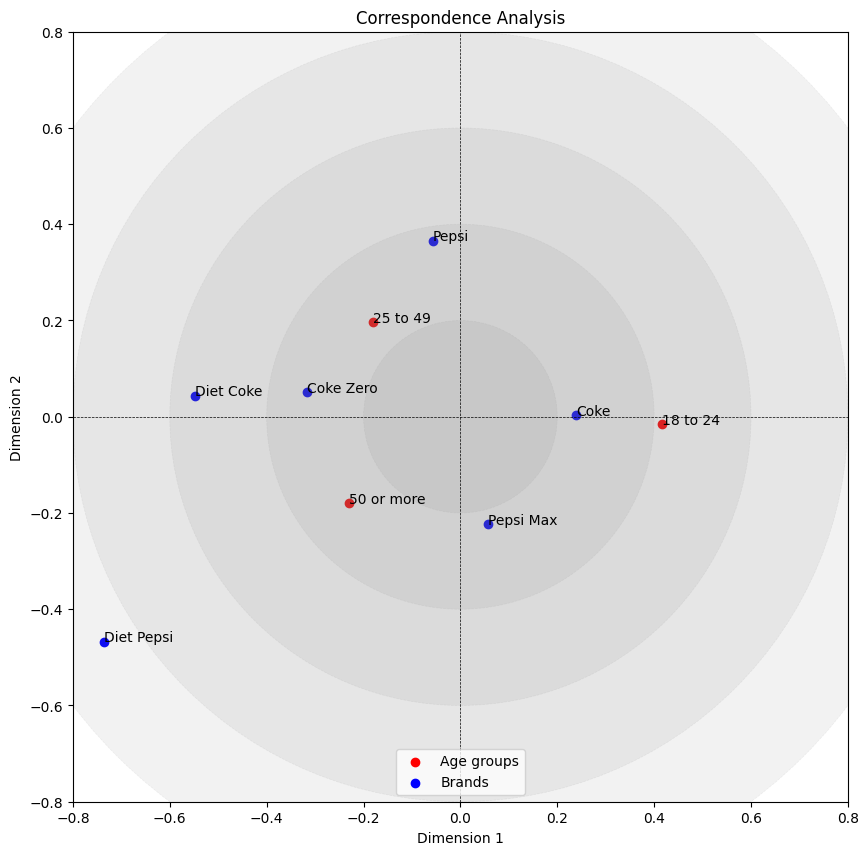

In [15]:
# Increase the size of the chart
plt.figure(figsize=(10, 10))

# Create scatter plot for column coordinates
plt.scatter(column_coords_excel2.iloc[:, 0], column_coords_excel2.iloc[:, 1], c='red', label='Age groups')
for i, txt in enumerate(column_coords_excel2.index):
    plt.annotate(txt, (column_coords_excel2.iloc[i, 0], column_coords_excel2.iloc[i, 1]))

# Create scatter plot for row coordinates
plt.scatter(row_coords_excel2.iloc[:, 0], row_coords_excel2.iloc[:, 1], c='blue', label='Brands')
for i, txt in enumerate(row_coords_excel2.index):
    plt.annotate(txt, (row_coords_excel2.iloc[i, 0], row_coords_excel2.iloc[i, 1]))


# Add lines on the zero axis
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)

radius = 0.2
for i in range(1, 6):
    circle = Circle((0, 0), radius * i, facecolor='gray', alpha = 0.1, edgecolor='gray', linestyle='--', linewidth=0.5)
    plt.gca().add_patch(circle)

# Set plot title and labels
plt.title("Correspondence Analysis")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# Add legend
plt.legend()

# Set the limits of the axis
plt.ylim(-0.8,0.8)
plt.xlim(-0.8,0.8)

# Show the plot
plt.show()

In [16]:
# Increase the size of the chart
plt.figure(figsize=(10, 10))

# Create Prince's chart
ca.plot(data_excel2)

alt.Chart(...)

<Figure size 1000x1000 with 0 Axes>

In [17]:
ca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.086,78.44%,78.44%
1,0.024,21.56%,100.00%


In [18]:
dataset = prince.datasets.load_decathlon()

In [19]:
dataset.head(10)

100m  long.jump  shot.put  high.jump   400m  \
competition athlete                                                   
Decastar    Sebrle     11.04       7.58     14.83       2.07  49.81   
            Clay       10.76       7.40     14.26       1.86  49.37   
            Karpov     11.02       7.30     14.77       2.04  48.37   
            Bernard    11.02       7.23     14.25       1.92  48.93   
            Yurkov     11.34       7.09     15.19       2.10  50.42   
            Warners    11.11       7.60     14.31       1.98  48.68   
            Zsivoczky  11.13       7.30     13.48       2.01  48.62   
            Mcmullen   10.83       7.31     13.76       2.13  49.91   
            Martineau  11.64       6.81     14.57       1.95  50.14   
            Hernu      11.37       7.56     14.41       1.86  51.10   

                       110m.hurdle  discus  pole.vault  javeline  1500m  rank  \
competition athlete                                                             
Decastar    Sebrle           14.69   43.75        5.02     63.19  291.7     1   
            Clay             14.05   50.72        4.92     60.15  301.5     2   
            Karpov           14.09   48.95        4.92     50.31  300.2     3   
            Bernard          14.99   40.87        5.32     62.77  280.1     4   
            Yurkov           15.31   46.26        4.72     63.44  276.4     5   
            Warners          14.23   41.10        4.92     51.77  278.1     6   
            Zsivoczky        14.17   45.67        4.42     55.37  268.0     7   
            Mcmullen         14.38   44.41        4.42     56.37  285.1     8   
            Martineau        14.93   47.60        4.92     52.33  262.1     9   
            Hernu            15.06   44.99        4.82     57.19  285.1    10   

                       points  
competition athlete            
Decastar    Sebrle       8217  
            Clay         8122  
            Karpov       8099  
            Bernard      8067  
            Yurkov       8036  
            Warners      8030  
            Zsivoczky    8004  
            Mcmullen     7995  
            Martineau    7802  
            Hernu        7733

1. The closer the row labels of the table are together, the more similar the are.
2. The closer the column labels, the more similar the are
3. Draw lines from the labels to the middle
    - The smaller the angle, the stronger the correlation
    - The longer the lines the stronger the correlation
Strengh = Length 1 * Length 2 * Cost(Angle)

Conclusions:
- Coke is particularly strong with the 18 to 24s
- Diet Coke is weak with the 18 to 24s
- Pepsi is stringer with the 24 to 49s
- Diet Pepsi is stronger with the 50 or more group.
- Coke is stronger among the 18 to 24s

Thing we CANNOT see on the graph:
- Coke is stronger among all ages than other brands

In the table, you should use the percentage that you want to describe in the data. You can use total percentage, columns percentage, row percentage or absolute values.

In [20]:
data_excel3 = pd.read_excel('Soft Drinks 2.xlsx')
print(data_excel3)

   Unnamed: 0  18 to 24  25 to 49  50 or more
0        Coke  0.442177  0.285714    0.272109
1   Diet Coke  0.071429  0.464286    0.464286
2   Coke Zero  0.180000  0.420000    0.400000
3       Pepsi  0.291667  0.500000    0.208333
4  Diet Pepsi  0.000000  0.285714    0.714286
5   Pepsi Max  0.363636  0.227273    0.409091


In [21]:
# Set 'Column 0' as the index
data_excel3.set_index('Unnamed: 0', inplace=True)
print(data_excel3)

            18 to 24  25 to 49  50 or more
Unnamed: 0                                
Coke        0.442177  0.285714    0.272109
Diet Coke   0.071429  0.464286    0.464286
Coke Zero   0.180000  0.420000    0.400000
Pepsi       0.291667  0.500000    0.208333
Diet Pepsi  0.000000  0.285714    0.714286
Pepsi Max   0.363636  0.227273    0.409091


In [22]:
# Perform correspondence analysis
ca = prince.CA(n_components=2)
ca.fit(data_excel3)

# Access the results
column_coords_excel3 = ca.column_coordinates(data_excel3)
row_coords_excel3 = ca.row_coordinates(data_excel3)
eigenvalues_excel3 = ca.eigenvalues_
total_inertia_excel3 = ca.total_inertia_

# Print the results
print("Column Coordinates:")
print(column_coords_excel3)
print("\nRow Coordinates:")
print(row_coords_excel3)
print("\nEigenvalues:")
print(eigenvalues_excel3)
print("\nTotal Inertia:")
print(total_inertia_excel3)

Column Coordinates:
                   0         1
18 to 24   -0.681073 -0.145208
25 to 49    0.021671  0.279999
50 or more  0.353064 -0.168292

Row Coordinates:
                   0         1
Unnamed: 0                    
Coke       -0.503996 -0.141563
Diet Coke   0.317605  0.195781
Coke Zero   0.070279  0.113930
Pepsi      -0.289528  0.295314
Diet Pepsi  0.654743 -0.189726
Pepsi Max  -0.249102 -0.273737

Eigenvalues:
[0.15573168 0.04491475]

Total Inertia:
0.20064643883816247


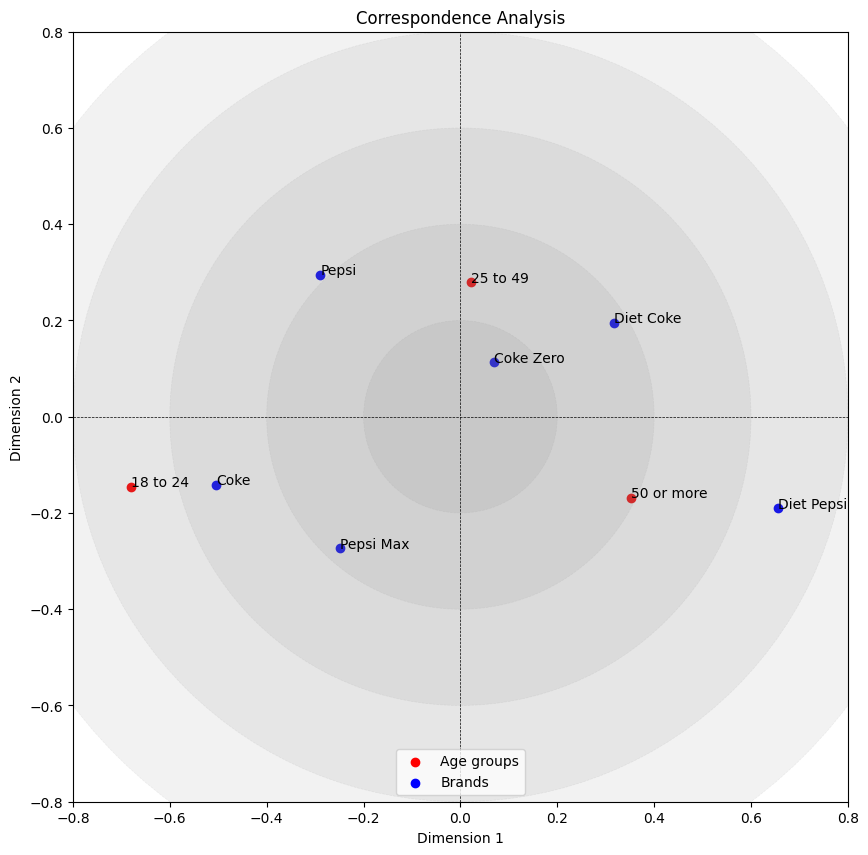

In [23]:
# Increase the size of the chart
plt.figure(figsize=(10, 10))

# Create scatter plot for column coordinates
plt.scatter(column_coords_excel3.iloc[:, 0], column_coords_excel3.iloc[:, 1], c='red', label='Age groups')
for i, txt in enumerate(column_coords_excel3.index):
    plt.annotate(txt, (column_coords_excel3.iloc[i, 0], column_coords_excel3.iloc[i, 1]))

# Create scatter plot for row coordinates
plt.scatter(row_coords_excel3.iloc[:, 0], row_coords_excel3.iloc[:, 1], c='blue', label='Brands')
for i, txt in enumerate(row_coords_excel3.index):
    plt.annotate(txt, (row_coords_excel3.iloc[i, 0], row_coords_excel3.iloc[i, 1]))


# Add lines on the zero axis
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)

radius = 0.2
for i in range(1, 6):
    circle = Circle((0, 0), radius * i, facecolor='gray', alpha = 0.1, edgecolor='gray', linestyle='--', linewidth=0.5)
    plt.gca().add_patch(circle)

# Set plot title and labels
plt.title("Correspondence Analysis")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# Add legend
plt.legend()

# Set the limits of the axis
plt.ylim(-0.8,0.8)
plt.xlim(-0.8,0.8)

# Show the plot
plt.show()

ANGLE BETWEEN TWO CHARACTERISTICS

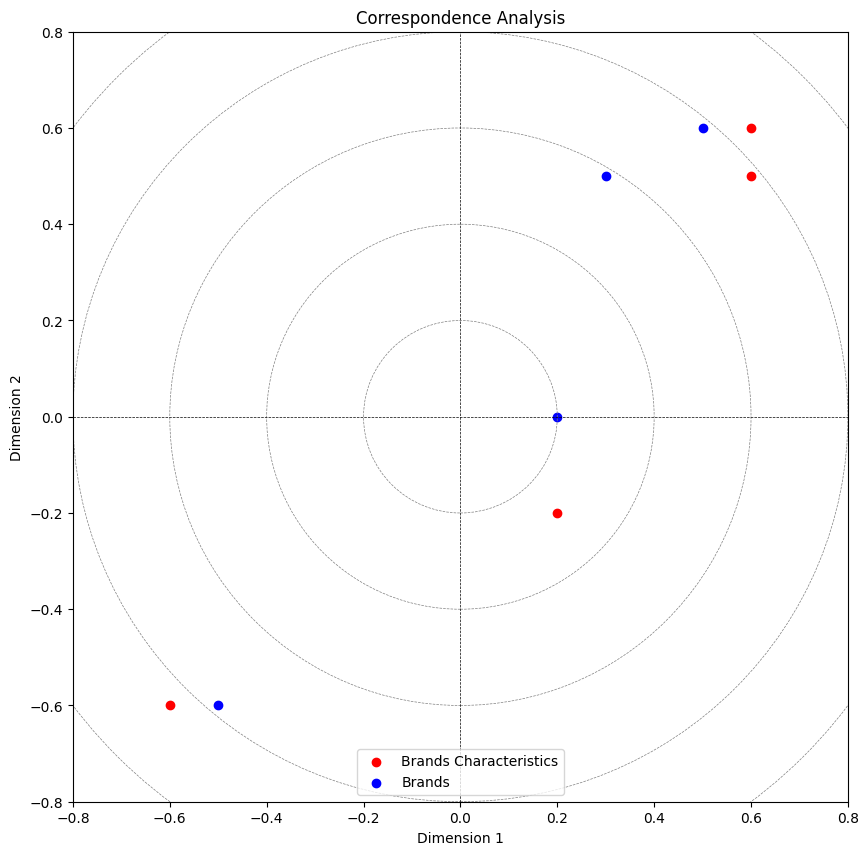

In [24]:
# Increase the size of the chart
plt.figure(figsize=(10, 10))

# Create scatter plot for column coordinates
plt.scatter([0.6,-0.6,0.2,0.6], [0.6,-0.6,-0.2,0.5], c='red', label='Brands Characteristics')


# Create scatter plot for column coordinates
plt.scatter([0.5,-0.5,0.2,0.3], [0.6,-0.6,0,0.5], c='blue', label='Brands')



# Add lines on the zero axis
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)

radius = 0.2
for i in range(1, 6):
    circle = Circle((0, 0), radius * i, facecolor='none', edgecolor='gray', linestyle='--', linewidth=0.5)
    plt.gca().add_patch(circle)

# Set plot title and labels
plt.title("Correspondence Analysis")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# Add legend
plt.legend()

# Set the limits of the axis
plt.ylim(-0.8,0.8)
plt.xlim(-0.8,0.8)

# Show the plot
plt.show()

DISTANCE FROM THE CENTRE

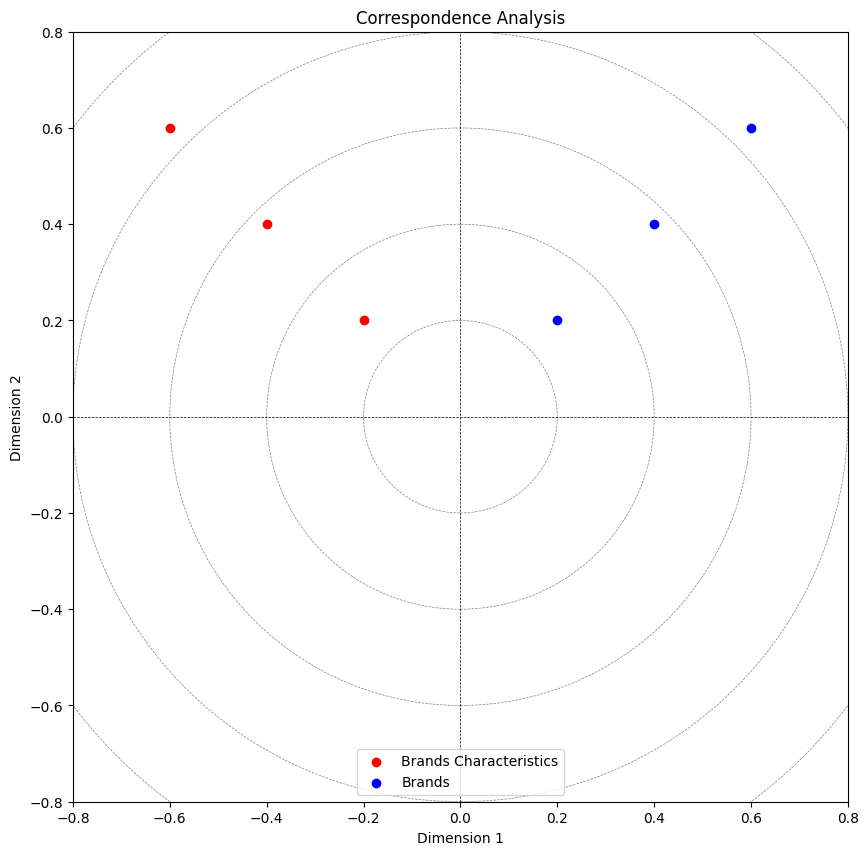

In [25]:
# Increase the size of the chart
plt.figure(figsize=(10, 10))

# Create scatter plot for column coordinates
plt.scatter([-0.6,-0.4,-0.2], [0.6,0.4,0.2], c='red', label='Brands Characteristics')


# Create scatter plot for column coordinates
plt.scatter([0.6,0.4,0.2], [0.6,0.4,0.2], c='blue', label='Brands')



# Add lines on the zero axis
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)

radius = 0.2
for i in range(1, 6):
    circle = Circle((0, 0), radius * i, facecolor='none', edgecolor='gray', linestyle='--', linewidth=0.5)
    plt.gca().add_patch(circle)

# Set plot title and labels
plt.title("Correspondence Analysis")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# Add legend
plt.legend()

# Set the limits of the axis
plt.ylim(-0.8,0.8)
plt.xlim(-0.8,0.8)

# Show the plot
plt.show()

In [26]:
data_excelABS = pd.read_excel('Soft Drinks Absolute values.xlsx')
print(data_excelABS)

   Unnamed: 0  18 to 24  25 to 49  50 or more
0        Coke        89       147          41
1   Diet Coke        14       239          70
2   Coke Zero        36       216          60
3       Pepsi        59       258          31
4  Diet Pepsi         0       147         107
5   Pepsi Max        73       117          61


In [27]:
# Set 'Column 0' as the index
data_excelABS.set_index('Unnamed: 0', inplace=True)
print(data_excelABS)

            18 to 24  25 to 49  50 or more
Unnamed: 0                                
Coke              89       147          41
Diet Coke         14       239          70
Coke Zero         36       216          60
Pepsi             59       258          31
Diet Pepsi         0       147         107
Pepsi Max         73       117          61


In [28]:
# Perform correspondence analysis
ca = prince.CA(n_components=2)
ca.fit(data_excelABS)

# Access the results
column_coords_excelABS = ca.column_coordinates(data_excelABS)
row_coords_excelABS = ca.row_coordinates(data_excelABS)
eigenvalues_excelABS = ca.eigenvalues_
total_inertia_excelABS = ca.total_inertia_

# Print the results
print("Column Coordinates:")
print(column_coords_excelABS)
print("\nRow Coordinates:")
print(row_coords_excelABS)
print("\nEigenvalues:")
print(eigenvalues_excelABS)
print("\nTotal Inertia:")
print(total_inertia_excelABS)

Column Coordinates:
                   0         1
18 to 24   -0.725580 -0.160700
25 to 49    0.064577  0.151846
50 or more  0.335264 -0.343582

Row Coordinates:
                   0         1
Unnamed: 0                    
Coke       -0.456111 -0.105155
Diet Coke   0.271988  0.148481
Coke Zero   0.077815  0.098449
Pepsi      -0.138371  0.262698
Diet Pepsi  0.545881 -0.272941
Pepsi Max  -0.303938 -0.285416

Eigenvalues:
[0.10705298 0.04339533]

Total Inertia:
0.1504483069998618


In [29]:
ca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.107,71.16%,71.16%
1,0.043,28.84%,100.00%


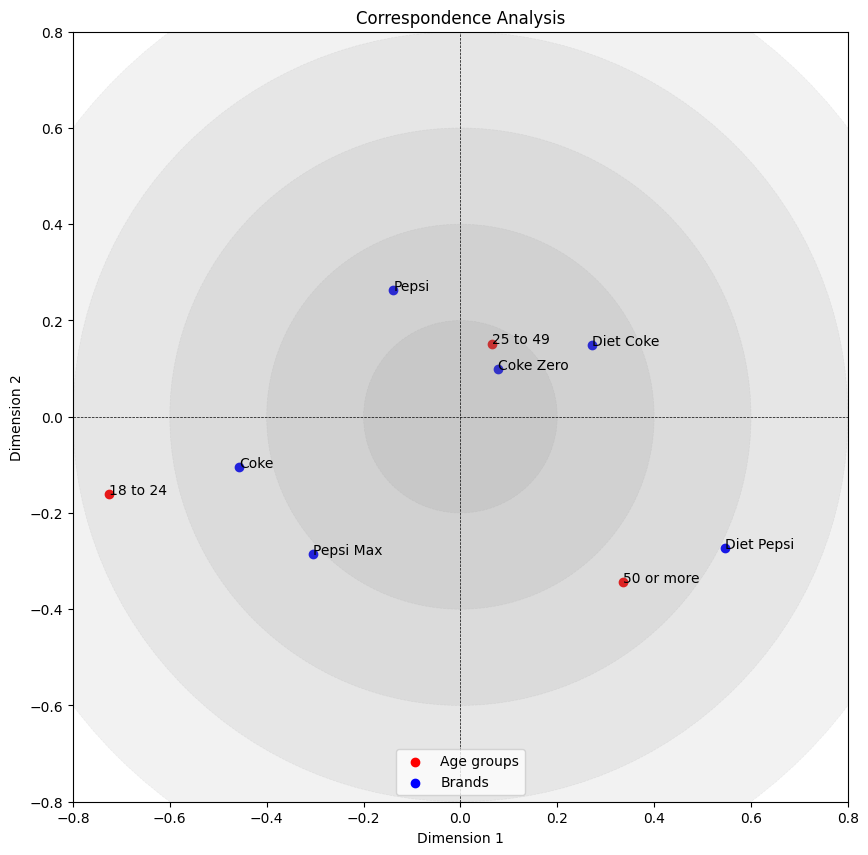

In [30]:
# Increase the size of the chart
plt.figure(figsize=(10, 10))

# Create scatter plot for column coordinates
plt.scatter(column_coords_excelABS.iloc[:, 0], column_coords_excelABS.iloc[:, 1], c='red', label='Age groups')
for i, txt in enumerate(column_coords_excelABS.index):
    plt.annotate(txt, (column_coords_excelABS.iloc[i, 0], column_coords_excelABS.iloc[i, 1]))

# Create scatter plot for row coordinates
plt.scatter(row_coords_excelABS.iloc[:, 0], row_coords_excelABS.iloc[:, 1], c='blue', label='Brands')
for i, txt in enumerate(row_coords_excelABS.index):
    plt.annotate(txt, (row_coords_excelABS.iloc[i, 0], row_coords_excelABS.iloc[i, 1]))


# Add lines on the zero axis
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)

radius = 0.2
for i in range(1, 6):
    circle = Circle((0, 0), radius * i, facecolor='gray', alpha = 0.1, edgecolor='gray', linestyle='--', linewidth=0.5)
    plt.gca().add_patch(circle)

# Set plot title and labels
plt.title("Correspondence Analysis")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# Add legend
plt.legend()

# Set the limits of the axis
plt.ylim(-0.8,0.8)
plt.xlim(-0.8,0.8)

# Show the plot
plt.show()

In [31]:
import inspect

default_args = inspect.signature(prince.CA).parameters
default_n_iter = default_args['n_iter'].default

print(f"Default value of n_iter: {default_n_iter}")

Default value of n_iter: 10


In [32]:
print(inspect.signature(prince.CA).parameters)

OrderedDict([('n_components', <Parameter "n_components=2">), ('n_iter', <Parameter "n_iter=10">), ('copy', <Parameter "copy=True">), ('check_input', <Parameter "check_input=True">), ('random_state', <Parameter "random_state=None">), ('engine', <Parameter "engine='sklearn'">)])


In [33]:
dataset = prince.datasets.load_french_elections()
dataset[['Le Pen', 'Macron', 'Mélenchon', 'Abstention']].head()

candidate,Le Pen,Macron,Mélenchon,Abstention
region,,,,
Auvergne-Rhône-Alpes,943294,1175085,897434,1228490
Bourgogne-Franche-Comté,409639,394117,277899,456682
Bretagne,385393,647172,407527,543425
Centre-Val de Loire,347845,383851,251259,459528
Corse,42283,26795,19779,90636


In [34]:
ca = prince.CA(
    n_components=2
)
ca = ca.fit(dataset)

In [35]:
ca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.021,40.82%,40.82%
1,0.018,36.15%,76.97%
